In [1]:
%matplotlib inline
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline as US
import scipy.integrate as s_int
import time

In [2]:
time0=time.time()

Part 1
-

Rectangle Rule
-

In [5]:
#function we are integrating
def f(x):
    return 1/x**(3/2)

In [6]:
#start and end of integration
a=1.0
b=5.0

In [7]:
#define rectangle rule integration
def rectangle_rule(N):
    #step size based on endpoints and desired number of intervals N
    h_r=(b-a)/N
    #array of N steps from a to b-h 
    x_rectangle=np.linspace(a, b-h_r, N)
    #rectangle rule integration formula
    return np.sum(f(x_rectangle)*h_r)

Trapezoid Rule
-

In [9]:
#define trapezoid rule integration
def trapezoid_rule(N):
    #step size based on endpoints and desired number of intervals N
    h_t=(b-a)/N
    #array of N steps from a to b, N+1 to include right endpoint
    x_trapezoid=np.linspace(a, b, N+1)
    #trapezoid rule integration formula
    return h_t*np.sum((f(x_trapezoid[:-1])+f(x_trapezoid[1:]))/2)
#regarding function evaluations, I believe this is refering to the fact that you reuse f(xi+1) values as f(xi) values in the following interval

Simpson's Rule
-

In [11]:
#define simpson's rule integration
def simpsons_rule(N):
    #must make sure N is even for simpson's rule (https://ocw.mit.edu/courses/18-01sc-single-variable-calculus-fall-2010/6d3381fa8d07b76cb5004e9426a2cdaa_MIT18_01SCF10_Ses63d.pdf)
    if N%2==1:
        N+=1
    #step size based on endpoints and desired number of intervals N
    h_s=(b-a)/N
    #sum of f(a+(2i-1)h) from i=1 to N/2+1 to include N/2
    first_sum=[f(a+(2*i-1)*h_s) for i in range(1, (N//2)+1)]
    #sum of f(a+2ih) from i=1 to N/2 to include N/2-1
    second_sum=[f(a+(2*i*h_s)) for i in range(1, (N//2))]
    #simpson's rule integration formula
    return (h_s/3)*(f(a)+f(b)+4*np.sum(first_sum)+2*np.sum(second_sum))
    

Compute Integral, Error for Several N, and Time 
-

In [16]:
#set some basic raParams
plt.rcParams['lines.linewidth']= 1.0
plt.rcParams['axes.linewidth']=1.5
plt.rcParams['font.size']= 14.0
plt.rcParams['axes.labelsize']=14.0
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['xtick.major.size']=6
plt.rcParams['xtick.minor.size']=3
plt.rcParams['xtick.major.width']=1.0
plt.rcParams['xtick.minor.width']=0.5
plt.rcParams['axes.linewidth']=1.0
plt.rcParams['axes.titlesize']=14#'large'
plt.rcParams['xtick.labelsize'] = 14#'x-large' # fontsize of the tick labels
plt.rcParams['ytick.labelsize']=14 #'x-large'
plt.rcParams['ytick.major.width']=1.0 #4
plt.rcParams['ytick.minor.width']=0.5 #2.0
plt.rcParams['ytick.major.size']=6
plt.rcParams['ytick.minor.size']=3

plt.rcParams['figure.dpi'] = 150

In [22]:
#pick some N
#tried N_vals=[5,10,100,500, 700, 1000] #but think I need more
N_vals = np.logspace(np.log10(5), np.log10(1000), 30, dtype=int)
#N_vals = np.arange(5, 1001, 5, dtype=int)

#need the analytic solution
def exact_int():
    #integral of 1/x^(3/2)
    return -2*(b**(-1/2)) + 2*(a**(-1/2))
#create empty arrays for errors and times
rectangle_err=[]
trapezoid_err=[]
simpsons_err=[]
rectangle_time=[]
trapezoid_time=[]
simpsons_time=[]

exact=exact_int()

#for loop to calculate integrals and errors
for N in N_vals:
    #start time
    t_0r=time.time()
    #integrate with rectangle method
    rectangle_int=rectangle_rule(N)
    #append the time
    rectangle_time.append(time.time()-t_0r)
    #append the error
    rectangle_err.append(abs(rectangle_int-exact))

    #start time
    t_0t=time.time()
    #integrate with trapezoid method
    trapezoid_int=trapezoid_rule(N)
    #append the time
    trapezoid_time.append(time.time()-t_0t)
    #append the error
    trapezoid_err.append(abs(trapezoid_int-exact))

    #start time
    t_0s=time.time()
    #integrate with simpson's method
    simpsons_int=simpsons_rule(N)
    #append the time
    simpsons_time.append(time.time()-t_0s)
    #append the error
    simpsons_err.append(abs(simpsons_int-exact))
    

In [24]:
#check exact solution
exact

1.1055728090000843

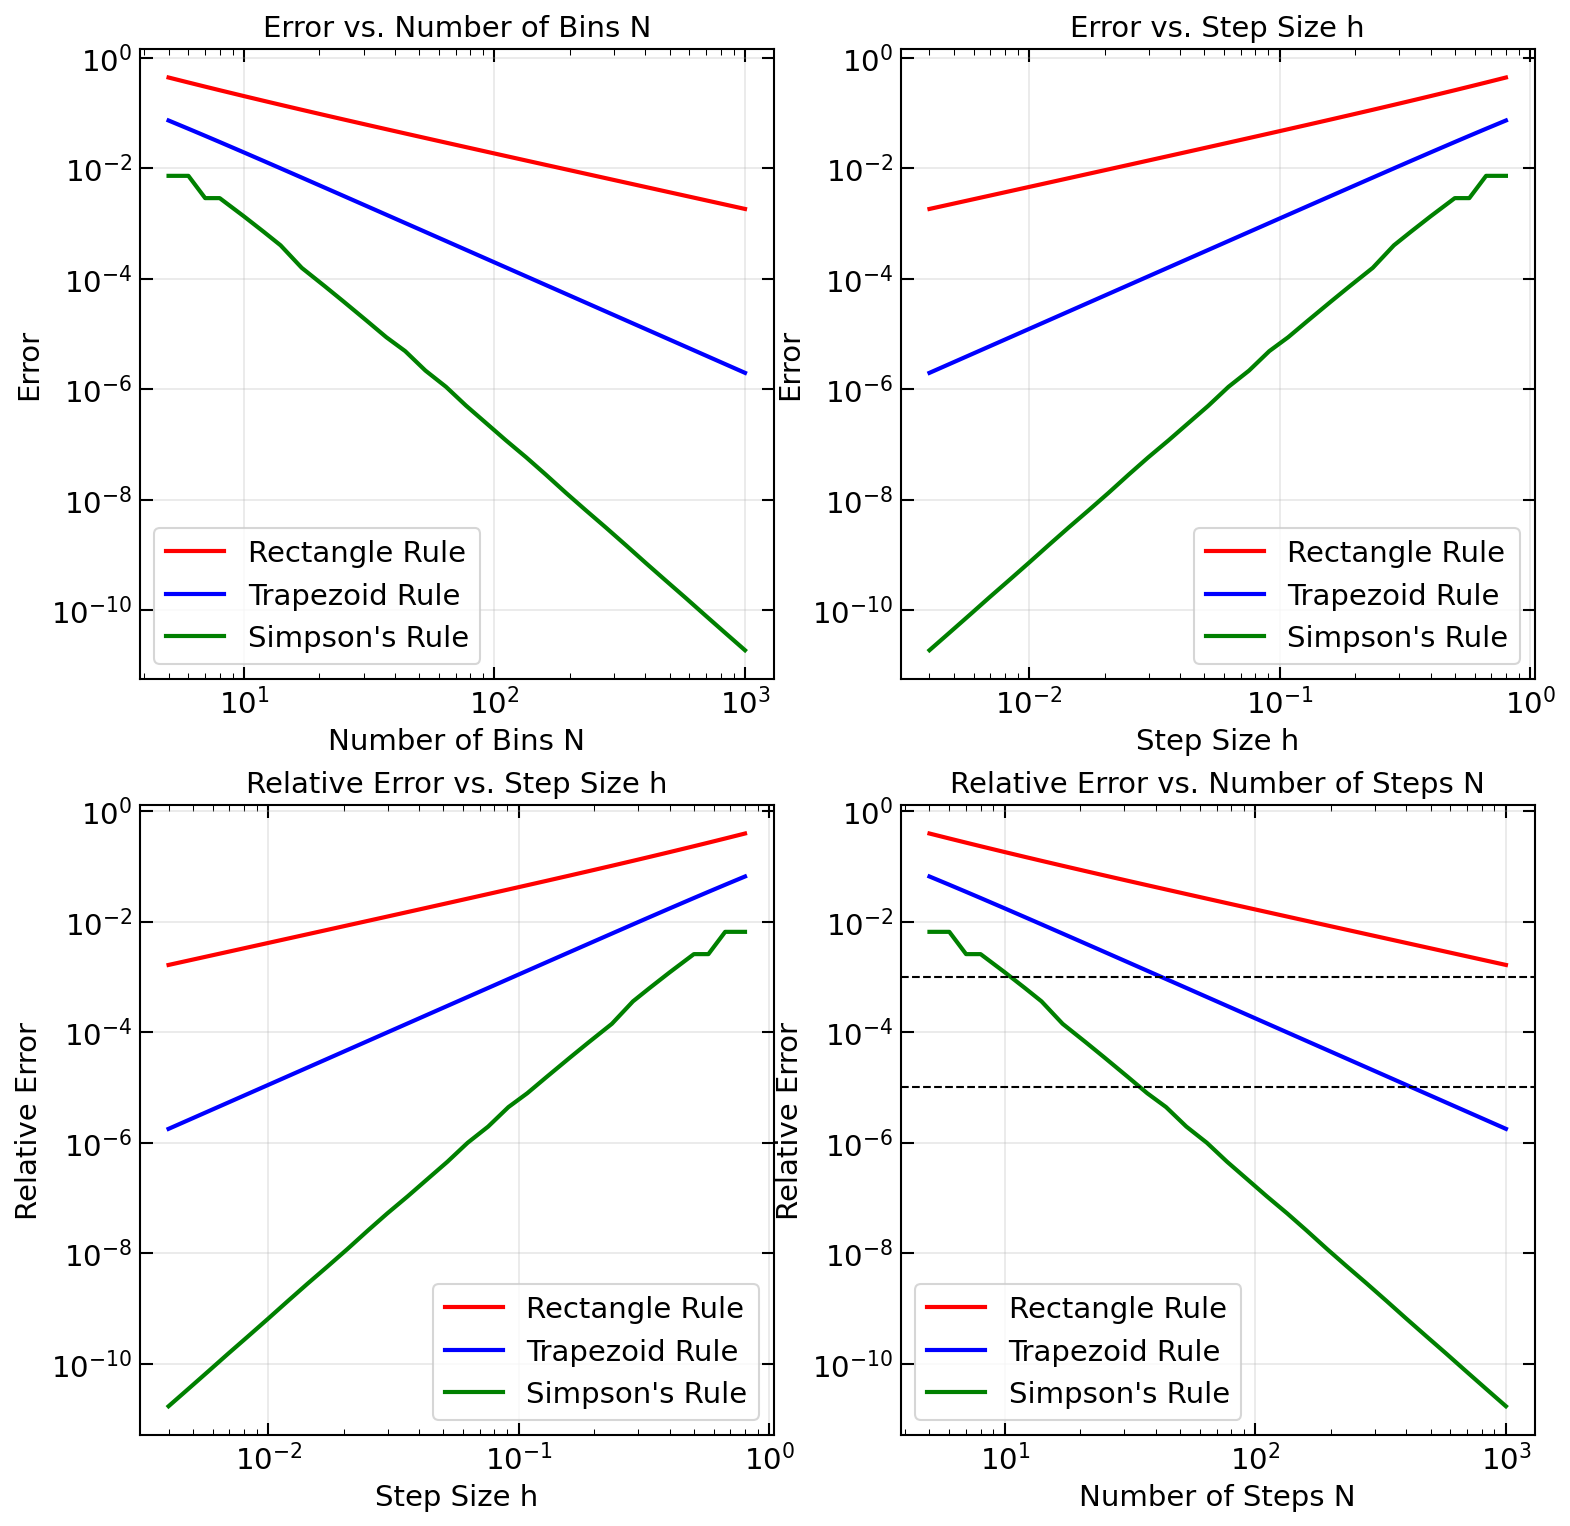

In [26]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

#axes for different plots
ax1 = fig.add_subplot(gs[0, 0])  # Row 0, Column 0
ax2 = fig.add_subplot(gs[0, 1])  # Row 0, Column 1
ax3 = fig.add_subplot(gs[1, 0])  # Row 1, Column 0
ax4 = fig.add_subplot(gs[1, 1])  # Row 1, Column 1

#plot errors vs N
ax1.loglog(N_vals, rectangle_err, color='r', linewidth= 2, label='Rectangle Rule')
ax1.loglog(N_vals, trapezoid_err, color='b', linewidth= 2, label='Trapezoid Rule')
ax1.loglog(N_vals, simpsons_err, color='g', linewidth= 2, label="Simpson's Rule")
ax1.tick_params(which='minor',direction='in', right=True, top=True)
ax1.tick_params(which='major',direction='in', right=True, top=True)
ax1.legend(loc='lower left')
ax1.set_xlabel('Number of Bins N')
ax1.set_ylabel('Error')
ax1.set_title('Error vs. Number of Bins N')
ax1.grid(alpha=0.3)

#empty array for h values
h_values=[]

#get h values for our N
for N in N_vals:
    h=(b-a)/N
    h_values.append(h)

#plot errors vs step size
ax2.loglog(h_values, rectangle_err, color='r', linewidth= 2, label='Rectangle Rule')
ax2.loglog(h_values, trapezoid_err, color='b', linewidth= 2, label='Trapezoid Rule')
ax2.loglog(h_values, simpsons_err, color='g', linewidth= 2, label="Simpson's Rule")
ax2.tick_params(which='minor',direction='in', right=True, top=True)
ax2.tick_params(which='major',direction='in', right=True, top=True)
ax2.legend(loc='lower right')
ax2.set_xlabel('Step Size h')
ax2.set_ylabel('Error')
ax2.set_title('Error vs. Step Size h')
ax2.grid(alpha=0.3)

#empty arrays for rel err
rectangle_rel_err=[]
trapezoid_rel_err=[]
simpsons_rel_err=[]

#for loop to calculate relative errors
for N in N_vals:
    #append the error
    rectangle_rel_err.append(abs(rectangle_rule(N)-exact)/exact)

    #append the error
    trapezoid_rel_err.append(abs(trapezoid_rule(N)-exact)/exact)

    #append the error
    simpsons_rel_err.append(abs(simpsons_rule(N)-exact)/exact)

#plot relative errors vs step size h 
ax3.loglog(h_values, rectangle_rel_err, color='r', linewidth= 2, label='Rectangle Rule')
ax3.loglog(h_values, trapezoid_rel_err, color='b', linewidth= 2, label='Trapezoid Rule')
ax3.loglog(h_values, simpsons_rel_err, color='g', linewidth= 2, label="Simpson's Rule")
ax3.tick_params(which='minor',direction='in', right=True, top=True)
ax3.tick_params(which='major',direction='in', right=True, top=True)
ax3.legend(loc='lower right')
ax3.set_xlabel('Step Size h')
ax3.set_ylabel('Relative Error')
ax3.set_title('Relative Error vs. Step Size h')
ax3.grid(alpha=0.3)

#plot related err vs steps 
ax4.loglog(N_vals, rectangle_rel_err, color='r', linewidth= 2, label='Rectangle Rule')
ax4.loglog(N_vals, trapezoid_rel_err, color='b', linewidth= 2, label='Trapezoid Rule')
ax4.loglog(N_vals, simpsons_rel_err, color='g', linewidth= 2, label="Simpson's Rule")
ax4.axhline(y=10**-3, color='black', linestyle = '--')
ax4.axhline(y=10**-5, color='black', linestyle = '--')
ax4.tick_params(which='minor',direction='in', right=True, top=True)
ax4.tick_params(which='major',direction='in', right=True, top=True)
ax4.legend(loc='lower left')
ax4.set_xlabel('Number of Steps N')
ax4.set_ylabel('Relative Error')
ax4.set_title('Relative Error vs. Number of Steps N')
ax4.grid(alpha=0.3)

In [28]:
#check err
rectangle_err

[0.4370682053470363,
 0.35513324155895987,
 0.2985820538081385,
 0.25732419946414775,
 0.20132471939956553,
 0.165188177865768,
 0.13998510741947023,
 0.11386688267107403,
 0.09115027476845672,
 0.07597557588207549,
 0.060784566552584574,
 0.05065162781130761,
 0.042402307081969015,
 0.035059323633938044,
 0.028934184318852196,
 0.02398199677685997,
 0.019808918784979035,
 0.01656582753635405,
 0.013699783616689887,
 0.011458686355711567,
 0.00948855561701234,
 0.00792042126855863,
 0.00657618667201465,
 0.0054700459388514755,
 0.00455364788275725,
 0.003794590734751857,
 0.003156596621432195,
 0.0026319609297043023,
 0.002189042694395127,
 0.0018230787800490589]

In [30]:
#check rel_err
rectangle_rel_err

[0.3953319055868739,
 0.32122103462381085,
 0.27007000477714876,
 0.23275192494728597,
 0.18209991939079084,
 0.1494141105145029,
 0.1266177191406121,
 0.10299356292423556,
 0.08244619804904207,
 0.06872055396404896,
 0.05498015694467025,
 0.04581482775170509,
 0.038353247055993564,
 0.03171145613254257,
 0.026171215575590365,
 0.021691919864192447,
 0.017917335361110103,
 0.014983931769574469,
 0.012391570690925741,
 0.010364479175347278,
 0.008582479181623593,
 0.00716408833871567,
 0.005948216723928265,
 0.004947703031696991,
 0.004118813203153681,
 0.0034322395629319134,
 0.0028551684662786914,
 0.0023806310251829844,
 0.0019800077177865544,
 0.001648990247596547]

Text(0, 0.5, 'Relative Error')

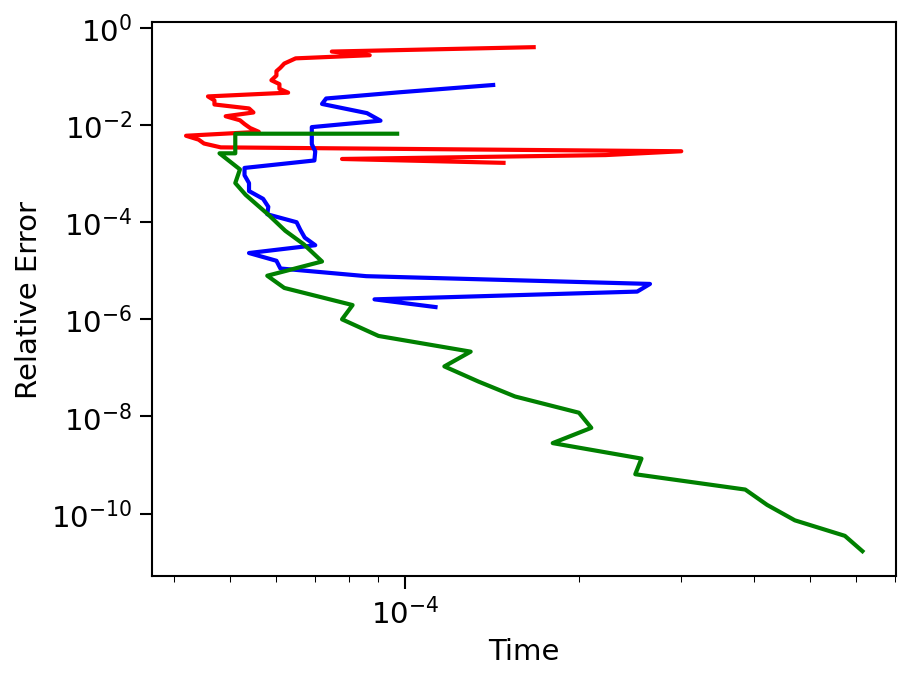

In [36]:
plt.loglog(rectangle_time, rectangle_rel_err, color='r', linewidth= 2, label='Rectangle Rule')
plt.loglog(trapezoid_time, trapezoid_rel_err, color='b', linewidth= 2, label='Trapezoid Rule')
plt.loglog(simpsons_time, simpsons_rel_err, color='g', linewidth= 2, label="Simpson's Rule")
plt.xlabel('Time')
plt.ylabel('Relative Error')

Answer question
-

About 10 steps for Simpson's Rule, about 6e1 for Trapezoid, and will need a bit more than 10^3 for Rectangle Rule relative error to reach 10^-3. For 10^-5, the number of steps respectively becomes 5e1, 5e2, and unreached by rectangle rule. Methods with greater accuracy required greater time as N increases.  

Part 2
-

Get positions
-

In [40]:
#start with some of 1.30 notebook
time0=time.time()

#total number of particles
nptot=10**6

#total mass of halo (in M_sun)
mtot=1e12

#Hernquist scale radius (in kpc)
aa=35.0

#Newton's constant, where M is in M_sun, v is in km/s, and r is in kpc:
gn=4.30071e-6

#set random state for reproducible results:
my_randState=np.random.RandomState(seed=8675309)

#select random numbers and find corresponding radii
randvs_r=my_randState.rand(nptot)
rvals=np.sort(1/(randvs_r**(-0.5)-1.))

In [130]:
#convert from spherical to cartesian still using what is in 1.30 notebook

#multiply radius by scale radius
rvals *= aa

# random numbers for phi, theta, v_phi, v_theta:
new_randvec=my_randState.rand(2, nptot)

#positions
pos=np.zeros((nptot, 3), dtype='float32')

#phi and theta
phir=2e0*np.pi*new_randvec[0]
thetar=np.arccos(1e0-2e0*new_randvec[1])

#convert
pos[:,0]=rvals*np.sin(thetar)*np.cos(phir)
pos[:,1]=rvals*np.sin(thetar)*np.sin(phir)
pos[:,2]=rvals*np.cos(thetar)

ttot=time.time()-time0
print('total time elapsed: {0:.2f} seconds'.format(ttot))

total time elapsed: 72.33 seconds


Define equations
-

In [193]:
#f(E) for q term via Herquist eq. 17, 20, 21
def f_E(E):
    qq = np.sqrt(aa/(gn*mtot)*E)
    v_g = np.sqrt(gn*mtot/aa)
    result = ((mtot/(8*np.sqrt(2)*np.pi**3*aa**3*v_g**3)) * (1/(1-qq**2)**(5/2)) * ((3*np.arcsin(qq))+((qq*(1-qq**2)**(1/2))*(1-(2*qq**2))*(
        (8*qq**4) - (8*qq**2)-3))))
    return result

#define potential
def phi(r):
    return gn*mtot/(r+aa)

#define p(E\r)
def distribution(E,r):
    return np.sqrt(phi(r)-E)*f_E(E)

#define bouding function
def bound(E):
    return f_E(E)*np.sqrt(gn*mtot/aa-E)


In [195]:

time0=time.time()
vel=np.zeros((nptot, 3), dtype='float32')

#set max energy
E_max=phi(0)

steps=1000
all_E= np.linspace(0, E_max, steps)

from scipy.integrate import cumulative_simpson

bounded_steps=bound(all_E)
bounded_cumulative=cumulative_simpson(bounded_steps, x=all_E, initial=0)

/var/folders/dk/29sc6fl97bjbgd3qznyyjypc0000gq/T/ipykernel_84225/245367458.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(all_E, np.log10(f_E(all_E)))


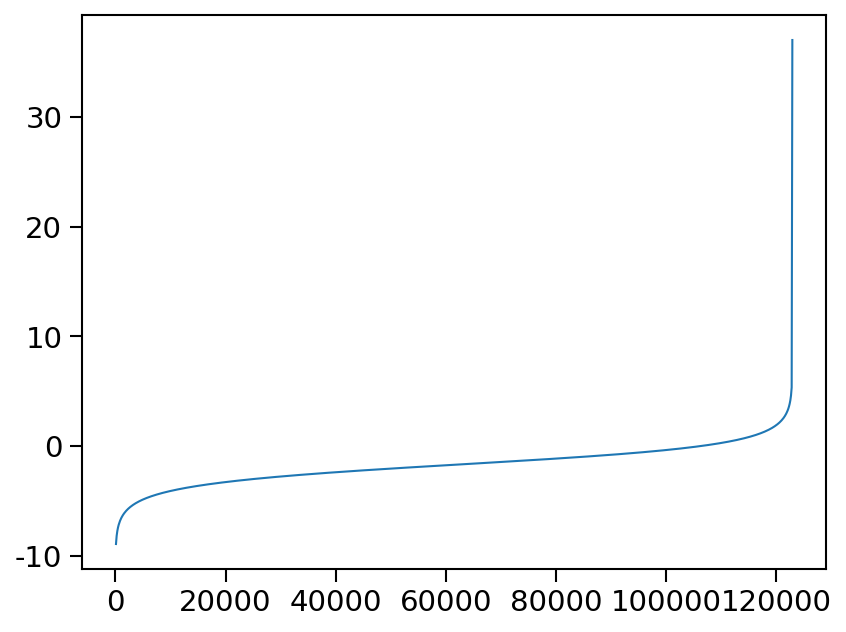

In [174]:
#check f(E) vs E
plt.plot(all_E, np.log10(f_E(all_E)))

/var/folders/dk/29sc6fl97bjbgd3qznyyjypc0000gq/T/ipykernel_84225/1228750674.py:11: RuntimeWarning: divide by zero encountered in log
  axs[0].plot(energies,np.log(fE), label=str(r)+'kpc', alpha=0.75, linewidth=2)
/var/folders/dk/29sc6fl97bjbgd3qznyyjypc0000gq/T/ipykernel_84225/1228750674.py:19: RuntimeWarning: divide by zero encountered in log10
  axs[2].plot(energies, np.log10(dist), linewidth=2)
/var/folders/dk/29sc6fl97bjbgd3qznyyjypc0000gq/T/ipykernel_84225/1228750674.py:21: RuntimeWarning: divide by zero encountered in log10
  axs[2].plot(all_energies, np.log10(bound(all_energies)), '--k', linewidth=1)


Text(0, 0.5, 'log p(E|r)')

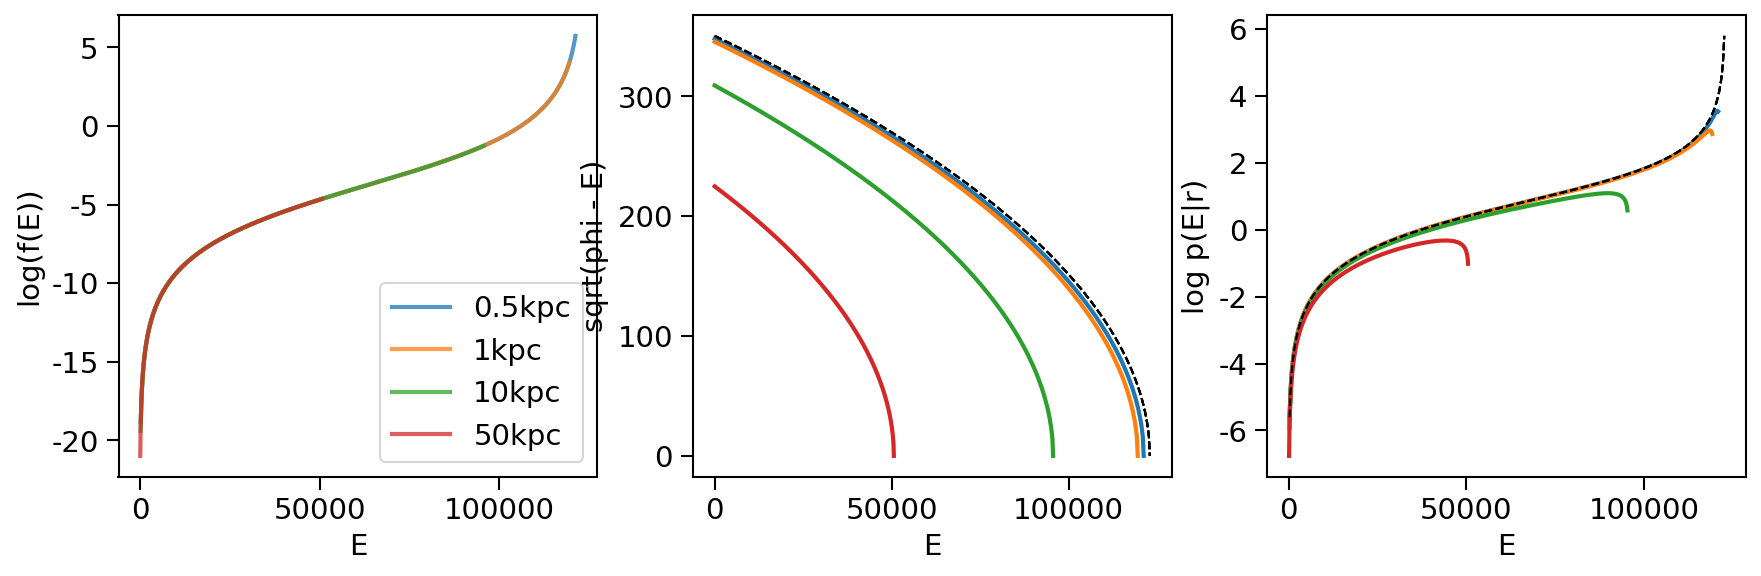

In [161]:
#check the distribution function and test comparison function, thank you Michelle
fig, axs = plt.subplots(1,3, figsize=(14,4))
fig.subplots_adjust(wspace=0.2)
npoints = 500
r_checks = [0.5, 1, 10,50]
all_energies = np.linspace(0,phi(0),npoints)
for r in r_checks:
    energies = np.linspace(0,phi(r),npoints)
    fE = f_E(energies)
    # Look at f(E)
    axs[0].plot(energies,np.log(fE), label=str(r)+'kpc', alpha=0.75, linewidth=2)
    # Look at sqrt(phi-E)
    sq_term = [np.sqrt(phi(r)-E) for E in energies]
    axs[1].plot(energies, sq_term, linewidth=2)
    # Suggested function to bound the sqrt term --> use r = 0
    axs[1].plot(all_energies, np.sqrt(gn*mtot/aa-all_energies), '--k', linewidth=1)
    # Look at whole distribution function p(E|r)
    dist = [distribution(E,r) for E in energies]
    axs[2].plot(energies, np.log10(dist), linewidth=2)
    # test the bounding function
    axs[2].plot(all_energies, np.log10(bound(all_energies)), '--k', linewidth=1)
axs[0].set_xlabel('E')
axs[0].set_ylabel('log(f(E))')
axs[0].legend()
axs[1].set_xlabel('E')
axs[1].set_ylabel('sqrt(phi - E)')
axs[2].set_xlabel('E')
axs[2].set_ylabel('log p(E|r)')

Sample velocities
-

In [168]:
velocities=np.zeros(nptot)

#sampling velocities, loop over particles
for i in range(nptot):
    while True:
        E_maxi=phi(rvals[i])
        #got Michelle's help with this
        #find specifc indexes and get bounded cumulative
        max_idx=np.min(np.where(all_E > E_maxi))
        bounded_cumulative_i=bounded_cumulative[0:max_idx]

        #sample area under bounded curve
        A=np.random.uniform(0, bounded_cumulative_i[-1])

        idx=np.argmin(np.abs(bounded_cumulative_i-A))
        E_A=all_E[np.argmin(np.abs(bounded_cumulative_i-A))]

        y=np.random.uniform(0, bound(E_A))

        #accept those under curve
        if (y<= distribution(E_A, rvals[i])):
            #calculate velocities
            velocities[i]=np.sqrt(2*(phi(rvals[i])-E_A))
            break
         
ttot=time.time()-time0

# random numbers for velocity
new_randvec1=my_randState.rand(2)

#phi and theta velocity
phiv=2e0*np.pi*new_randvec1[0]
thetav=np.arccos(1e0-2e0*new_randvec1[1])

#convert velocities from spherical to cartesian
vel[:, 0]=velocities*np.sin(thetav)*np.cos(phiv) 
vel[:, 1]=velocities*np.sin(thetav)*np.sin(phiv)  
vel[:, 2]=velocities*np.cos(thetav) 


Find radial velocity component
-

In [186]:
#need the radial velocity component
#unit vector r for each particle, take dot product with velocity
r_mag = np.linalg.norm(pos, axis=1)
r_hat = pos / r_mag[:,np.newaxis]
v_r = np.sum(vel * r_hat, axis=1)

#make radial bins (in log)
num_bins = 30
logr_min = np.log10(np.min(r_mag))
logr_max = np.log10(np.max(r_mag))
r_bin = np.logspace(logr_min, logr_max, num_bins)

#assign each particle to a bin
bin_indices = np.digitize(r_mag, r_bin) - 1
v_mean = np.zeros(num_bins - 1)
bin_centers = (r_bin[:-1] + r_bin[1:]) / 2

#<v_r^2> for each bin
for i in range(num_bins - 1):
    in_bin = bin_indices == i
    if np.any(in_bin):
        v_mean[i] = np.mean(v_r[in_bin]**2)
    else:
        v_mean[i] = np.nan
        print('Found nan bin.')

Found nan bin.


/var/folders/dk/29sc6fl97bjbgd3qznyyjypc0000gq/T/ipykernel_84225/4090599595.py:11: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(bin_centers, np.sqrt(vr_true(bin_centers)), color = 'r', label='Radial Velocity Dispersion')


Text(0, 0.5, 'Radial velocty dispersion $<v_r^2>^{1/2} (km/s)$')

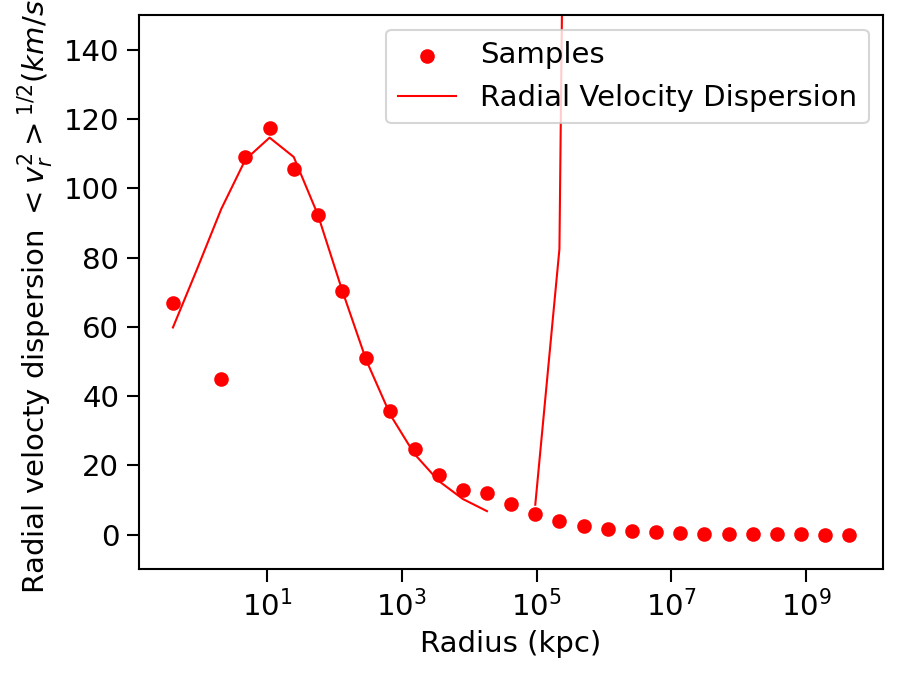

In [203]:
#check velocity dispersion
#eq 10 of Hernquist, square of velocity dispersion
def vr_true(r):
    term1 = gn*mtot/(12*aa)
    term2 = 12*r*(r+aa)**3/aa**4 * np.log((r+aa)/r)
    term3 = r/(r+aa) * (25 + 52*r/aa + 42*(r/aa)**2 +12*(r/aa)**3)
    return term1*(term2-term3)

#plot
plt.scatter(bin_centers, np.sqrt(v_mean), color = 'r', label='Samples')
plt.plot(bin_centers, np.sqrt(vr_true(bin_centers)), color = 'r', label='Radial Velocity Dispersion')
plt.ylim([-10,150])
plt.xscale('log')
plt.legend()
plt.xlabel('Radius (kpc)')
plt.ylabel('Radial velocty dispersion $<v_r^2>^{1/2} (km/s)$')

Answer question
-

My code is not very efficient, especially for the sampling the velocities (searching the array indices). It is more efficient at selecting velocities at higher radii because as the gravitational potential flattens the velocity ditribution narrows, resulting in less rejections. 